# Example

In [1]:
import numpy as np
import pandas as pd
from pandas.errors import EmptyDataError 
import matplotlib.pyplot as plt 
import seaborn as sns 
import upsetplot as up
import ast
from scipy.stats import ttest_rel, ranksums
import networkx as nx
import os
from scipy.stats import ttest_ind
from matplotlib.colors import LogNorm
import matplotlib.patches as mpatches
from scipy.stats import spearmanr
from matplotlib.colors import LinearSegmentedColormap





from tqdm.auto import tqdm 
tqdm.pandas()

import sys
sys.path.append('/home/klawren/oak/pcqtls/workflow/scripts')
from notebook_helper_functions import *
from annotate_clusters import *

# set higher figure resolution (for poster)
import matplotlib as mpl
#mpl.rcParams['figure.dpi']= 1000

In [2]:
# get outputs from a config file
prefix = '/home/klawren/oak/pcqtls'
import yaml
config_path= f'{prefix}/config/proteincoding_main.yaml'
with open(config_path, 'r') as f:
    config = yaml.safe_load(f)

gwas_meta = pd.read_csv(config['gwas_meta'], sep='\t', header=0)
gwas_ids = gwas_meta['Tag']
coloc_cutoff = .75

### load in gwas coloc to find interesting example

In [219]:
abc = pd.read_csv('/home/klawren/oak/pcqtls/data/references/functional_annotations/ABC_predictions/AllPredictions.AvgHiC.ABC0.015.minus150.ForABCPaperV3.txt.gz', sep='\t')

In [266]:
gid_gencode, full_gencode = load_gencode()
def get_gene_name(gene_id):
    try:
        return gid_gencode.loc[gene_id]['gene_name']
    except KeyError:
        return gene_id

In [ ]:
# load in annotations, find one with an intersting finemapping
susie_annotated = load_across_tissues(config, load_susie_annotated)

In [187]:
clusters = load_across_tissues(config, load_clusters_annotated)

In [ ]:
pair_coloc = load_across_tissues(config, load_pairwise_coloc)
gwas_coloc = load_gwas_coloc(config)

gwas_coloc_hits = gwas_coloc[gwas_coloc['PP.H4.abf'] > coloc_cutoff].reset_index()
pair_coloc_hits = pair_coloc[pair_coloc['PP.H4.abf'] > coloc_cutoff].reset_index()

underlying_signals = get_gwas_signals(gwas_coloc_hits, pair_coloc_hits)
underlying_signals['cluster_size'] = underlying_signals['cluster_id'].str.split('_').apply(len)

File is empty: /home/klawren/oak/pcqtls/output/proteincoding_main/coloc/gwas/Skin_Not_Sun_Exposed_Suprapubic/Skin_Not_Sun_Exposed_Suprapubic.v8.EGG_Pubertal_growth_10F.susie_True.gwas_coloc.txt
File is empty: /home/klawren/oak/pcqtls/output/proteincoding_main/coloc/gwas/Skin_Not_Sun_Exposed_Suprapubic/Skin_Not_Sun_Exposed_Suprapubic.v8.GEFOS_Forearm.susie_True.gwas_coloc.txt
File is empty: /home/klawren/oak/pcqtls/output/proteincoding_main/coloc/gwas/Skin_Not_Sun_Exposed_Suprapubic/Skin_Not_Sun_Exposed_Suprapubic.v8.UKB_G43_Diagnoses_main_ICD10_G43_Migraine.susie_True.gwas_coloc.txt
File is empty: /home/klawren/oak/pcqtls/output/proteincoding_main/coloc/gwas/Skin_Not_Sun_Exposed_Suprapubic/Skin_Not_Sun_Exposed_Suprapubic.v8.GPC-NEO-NEUROTICISM.susie_True.gwas_coloc.txt
File is empty: /home/klawren/oak/pcqtls/output/proteincoding_main/coloc/gwas/Skin_Not_Sun_Exposed_Suprapubic/Skin_Not_Sun_Exposed_Suprapubic.v8.PGC_ASD_2017_CEU.susie_True.gwas_coloc.txt
File is empty: /home/klawren/oak/

/home/klawren/oak/pcqtls/workflow/scripts/notebook_helper_functions.py:538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  underlying_signals_explode_gwas['gwas_type'] = underlying_signals_explode_gwas['cs_id'].str.split('gwas_').str[1].str.split('_cs').str[0]


I want a cluster with 
* more than 2 genes in the cluster
* fewer than 5 genes in the cluster
* more than 1 gwas hit in the cluster
* a pcqtl only hit in the cluster


to consider:
gwas only found by pcqtl not eqtl
negative corr

In [ ]:
# pcqtl only hit in a large cluster
pcqtl_gwas_colocs = underlying_signals[underlying_signals['num_e_coloc'] == 0]
pcqtl_gwas_colocs[pcqtl_gwas_colocs['cluster_size'] > 3]

,signal_id,num_qtl_coloc,num_gwas_coloc,num_e_coloc,num_pc_coloc,multiple_e,multiple_pc,type,cluster_id,tissue_id,cs_id,gwas_type,cluster_size
104,gwas_GLGC_Mc_HDL_cs_4_cluster_ENSG00000134184....,1,1,0,1,False,False,pcqtl_only,ENSG00000134184.12_ENSG00000134201.10_ENSG0000...,Muscle_Skeletal,[gwas_GLGC_Mc_HDL_cs_4_cluster_ENSG00000134184...,1,4
108,gwas_UKB_1180_Morning_or_evening_person_chrono...,1,1,0,1,False,False,pcqtl_only,ENSG00000105808.17_ENSG00000168255.19_ENSG0000...,Muscle_Skeletal,[gwas_UKB_1180_Morning_or_evening_person_chron...,1,6
205,gwas_Astle_et_al_2016_Platelet_count_cs_1_clus...,1,1,0,1,False,False,pcqtl_only,ENSG00000086506.2_ENSG00000188536.12_ENSG00000...,Adipose_Visceral_Omentum,[gwas_Astle_et_al_2016_Platelet_count_cs_1_clu...,1,4
303,gwas_GLGC_Mc_LDL_cs_2_cluster_ENSG00000141338....,1,1,0,1,False,False,pcqtl_only,ENSG00000141338.13_ENSG00000154258.16_ENSG0000...,Skin_Sun_Exposed_Lower_leg,[gwas_GLGC_Mc_LDL_cs_2_cluster_ENSG00000141338...,1,4
326,gwas_UKB_20002_1111_self_reported_asthma_cs_3_...,1,1,0,1,False,False,pcqtl_only,ENSG00000159455.8_ENSG00000163202.4_ENSG000001...,Whole_Blood,[gwas_UKB_20002_1111_self_reported_asthma_cs_3...,1,17
340,gwas_Astle_et_al_2016_Granulocyte_count_cs_2_c...,1,5,0,1,False,False,pcqtl_only,ENSG00000179344.16_ENSG00000196126.11_ENSG0000...,Whole_Blood,[gwas_Astle_et_al_2016_Granulocyte_count_cs_2_...,5,6
366,gwas_GLGC_Mc_HDL_cs_4_cluster_ENSG00000134184....,1,1,0,1,False,False,pcqtl_only,ENSG00000134184.12_ENSG00000134201.10_ENSG0000...,Whole_Blood,[gwas_GLGC_Mc_HDL_cs_4_cluster_ENSG00000134184...,1,5
445,gwas_UKB_1180_Morning_or_evening_person_chrono...,1,1,0,1,False,False,pcqtl_only,ENSG00000105808.17_ENSG00000168255.19_ENSG0000...,Esophagus_Muscularis,[gwas_UKB_1180_Morning_or_evening_person_chron...,1,6
475,gwas_GIANT_HEIGHT_cs_5_cluster_ENSG00000108511...,1,1,0,1,False,False,pcqtl_only,ENSG00000108511.9_ENSG00000120068.6_ENSG000001...,Esophagus_Muscularis,[gwas_GIANT_HEIGHT_cs_5_cluster_ENSG0000010851...,1,6
684,gwas_IBD.EUR.Ulcerative_Colitis_cs_10_cluster_...,1,1,0,1,False,False,pcqtl_only,ENSG00000179344.16_ENSG00000196126.11_ENSG0000...,Lung,[gwas_IBD.EUR.Ulcerative_Colitis_cs_10_cluster...,1,7


In [152]:
# make sure the same gwas hit isn't found as an eqtl in other tissues
underlying_signals_explode = underlying_signals.explode('cs_id')
underlying_signals_gwas = underlying_signals_explode[underlying_signals_explode['cs_id'].str.contains('gwas')]
underlying_signals_gwas['gwas_id'] = underlying_signals_gwas['cs_id'].str.split('_tissue_').str[0]
underlying_signals_gwas = underlying_signals_gwas.groupby('gwas_id').agg({'num_e_coloc':'sum'}).reset_index()
# get the set of gwas ids never found as an eqtl
pcqtl_gwas_cs_ids = underlying_signals_gwas[underlying_signals_gwas['num_e_coloc'] == 0]['gwas_id']

# check which signal groups have a pconly gwas
pcqtl_gwas_explode = pcqtl_gwas_colocs.explode('cs_id')
pcqtl_gwas_explode['gwas_id'] = pcqtl_gwas_explode['cs_id'].str.split('_tissue_').str[0]
pcqtl_signal_ids = pcqtl_gwas_explode[pcqtl_gwas_explode['gwas_id'].isin(pcqtl_gwas_cs_ids)]['signal_id'].unique()

pcqtl_gwas_colocs = pcqtl_gwas_colocs[pcqtl_gwas_colocs['signal_id'].isin(pcqtl_signal_ids)]
pcqtl_gwas_colocs[pcqtl_gwas_colocs['cluster_size'] == 3]

/local/scratch/klawren/slrmtmp.47748816/ipykernel_40278/3428187167.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  underlying_signals_gwas['gwas_id'] = underlying_signals_gwas['cs_id'].str.split('_tissue_').str[0]


,signal_id,num_qtl_coloc,num_gwas_coloc,num_e_coloc,num_pc_coloc,multiple_e,multiple_pc,type,cluster_id,tissue_id,cs_id,gwas_type,cluster_size
131,gwas_UKB_1807_Fathers_age_at_death_cs_1_cluste...,1,1,0,1,False,False,pcqtl_only,ENSG00000041357.15_ENSG00000080644.15_ENSG0000...,Muscle_Skeletal,[gwas_UKB_1807_Fathers_age_at_death_cs_1_clust...,1,3
267,gwas_EAGLE_Eczema_cs_3_cluster_ENSG00000160678...,1,3,0,1,False,False,pcqtl_only,ENSG00000160678.11_ENSG00000188643.10_ENSG0000...,Skin_Sun_Exposed_Lower_leg,[gwas_EAGLE_Eczema_cs_3_cluster_ENSG0000016067...,3,3
327,gwas_UKB_20002_1111_self_reported_asthma_cs_2_...,1,1,0,1,False,False,pcqtl_only,ENSG00000160678.11_ENSG00000188643.10_ENSG0000...,Whole_Blood,[gwas_UKB_20002_1111_self_reported_asthma_cs_2...,1,3
355,gwas_UKB_20002_1065_self_reported_hypertension...,1,1,0,1,False,False,pcqtl_only,ENSG00000067836.12_ENSG00000140623.13_ENSG0000...,Whole_Blood,[gwas_UKB_20002_1065_self_reported_hypertensio...,1,3
552,gwas_Astle_et_al_2016_Granulocyte_count_cs_1_c...,1,3,0,1,False,False,pcqtl_only,ENSG00000132376.19_ENSG00000167193.7_ENSG00000...,Thyroid,[gwas_Astle_et_al_2016_Granulocyte_count_cs_1_...,3,3
597,gwas_UKB_21001_Body_mass_index_BMI_cs_2_cluste...,1,1,0,1,False,False,pcqtl_only,ENSG00000106819.11_ENSG00000106823.12_ENSG0000...,Thyroid,[gwas_UKB_21001_Body_mass_index_BMI_cs_2_clust...,1,3
697,gwas_MAGNETIC_IDL.TG_cs_2_cluster_ENSG00000130...,1,1,0,1,False,False,pcqtl_only,ENSG00000130203.9_ENSG00000130208.9_ENSG000002...,Lung,[gwas_MAGNETIC_IDL.TG_cs_2_cluster_ENSG0000013...,1,3
733,gwas_Astle_et_al_2016_Red_blood_cell_count_cs_...,1,2,0,1,False,False,pcqtl_only,ENSG00000025708.13_ENSG00000130487.5_ENSG00000...,Nerve_Tibial,[gwas_Astle_et_al_2016_Red_blood_cell_count_cs...,2,3
1121,gwas_Astle_et_al_2016_Red_blood_cell_count_cs_...,1,1,0,1,False,False,pcqtl_only,ENSG00000078487.17_ENSG00000085514.15_ENSG0000...,Adipose_Subcutaneous,[gwas_Astle_et_al_2016_Red_blood_cell_count_cs...,1,3


In [238]:
# get a list of all pcqtl ids with a GWAS coloc that has no eqtl colocs
pcqtl_gwas_colocs_explode = pcqtl_gwas_colocs.explode('cs_id')
pcqtl_gwas_colocs_explode = pcqtl_gwas_colocs_explode[pcqtl_gwas_colocs_explode['cs_id'].str.contains('qtl_')]
pcqtl_gwas_colocs_explode['qtl_cs_id'] = pcqtl_gwas_colocs_explode['cs_id'].str.split('qtl_').str[1].str.split('_cluster').str[0]
pcqtl_qtl_ids = pcqtl_gwas_colocs_explode['qtl_cs_id'].unique()

In [ ]:
# check if any of the susie pcqtl coloc vars are in abc enhancers
susie_pcqtl_coloc = susie_annotated[susie_annotated['cs_id'].isin(pcqtl_qtl_ids)]
# add gene names 

def get_cluster_gene_names(susie_var):
    return [get_gene_name(s) for s in susie_var['cluster_id'].split('_')]

susie_pcqtl_coloc['gene_names'] = susie_pcqtl_coloc.progress_apply(get_cluster_gene_names, axis=1)

  0%|          | 0/7053 [00:00<?, ?it/s]

/local/scratch/klawren/slrmtmp.47748816/ipykernel_40278/3733351191.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  susie_pcqtl_coloc['gene_names'] = susie_pcqtl_coloc.progress_apply(get_cluster_gene_names, axis=1)


,phenotype_id,variant_id,cs_id,type,pip,cluster_id,start_distance,end_distance,af,ma_samples,...,qtl_in_tad,between_tss,qtl_in_tss_ctcf,qtl_in_tad_ctcf,in_bidirectional_promoter,in_shared_promoter,cluster_min_distance,cs_num,lead_variant_id,gene_names
1317,ENSG00000010626.14_ENSG00000111671.9_pc1,chr12_6948737_A_G_b38,ENSG00000010626.14_ENSG00000111671.9_pc1_cs_2,pcqtl,0.495816,ENSG00000010626.14_ENSG00000111671.9,59379.0,44004.0,0.056799,51.0,...,False,False,False,False,False,False,44004,2,chr12_6948737_A_G_b38,"[LRRC23, SPSB2]"
1318,ENSG00000010626.14_ENSG00000111671.9_pc1,chr12_6948807_A_G_b38,ENSG00000010626.14_ENSG00000111671.9_pc1_cs_2,pcqtl,0.495816,ENSG00000010626.14_ENSG00000111671.9,59449.0,44074.0,0.056799,51.0,...,False,False,False,False,False,False,44074,2,chr12_6948737_A_G_b38,"[LRRC23, SPSB2]"
1377,ENSG00000011021.21_ENSG00000177000.10_pc2,chr1_11769740_C_T_b38,ENSG00000011021.21_ENSG00000177000.10_pc2_cs_1,pcqtl,0.025077,ENSG00000011021.21_ENSG00000177000.10,-37180.0,-37391.0,0.150602,163.0,...,False,False,False,False,True,True,37180,1,chr1_11779915_G_A_b38,"[CLCN6, MTHFR]"
1378,ENSG00000011021.21_ENSG00000177000.10_pc2,chr1_11772232_C_A_b38,ENSG00000011021.21_ENSG00000177000.10_pc2_cs_1,pcqtl,0.027047,ENSG00000011021.21_ENSG00000177000.10,-34688.0,-34899.0,0.151463,164.0,...,False,False,False,False,True,True,34688,1,chr1_11779915_G_A_b38,"[CLCN6, MTHFR]"
1379,ENSG00000011021.21_ENSG00000177000.10_pc2,chr1_11772602_A_G_b38,ENSG00000011021.21_ENSG00000177000.10_pc2_cs_1,pcqtl,0.027047,ENSG00000011021.21_ENSG00000177000.10,-34318.0,-34529.0,0.151463,164.0,...,False,False,False,False,True,True,34318,1,chr1_11779915_G_A_b38,"[CLCN6, MTHFR]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896477,ENSG00000197093.10_ENSG00000213420.7_pc1,chr7_100247534_T_C_b38,ENSG00000197093.10_ENSG00000213420.7_pc1_cs_1,pcqtl,0.075502,ENSG00000197093.10_ENSG00000213420.7,78784.0,70165.0,0.037313,41.0,...,False,False,False,False,False,False,-70165,1,chr7_100244497_T_C_b38,"[GAL3ST4, GPC2]"
896478,ENSG00000197093.10_ENSG00000213420.7_pc1,chr7_100248831_G_A_b38,ENSG00000197093.10_ENSG00000213420.7_pc1_cs_1,pcqtl,0.039629,ENSG00000197093.10_ENSG00000213420.7,80081.0,71462.0,0.036567,40.0,...,False,False,False,False,False,False,-71462,1,chr7_100244497_T_C_b38,"[GAL3ST4, GPC2]"
896479,ENSG00000197093.10_ENSG00000213420.7_pc1,chr7_100252586_T_G_b38,ENSG00000197093.10_ENSG00000213420.7_pc1_cs_1,pcqtl,0.075502,ENSG00000197093.10_ENSG00000213420.7,83836.0,75217.0,0.037313,41.0,...,False,False,False,False,False,False,-75217,1,chr7_100244497_T_C_b38,"[GAL3ST4, GPC2]"
896480,ENSG00000197093.10_ENSG00000213420.7_pc1,chr7_100264444_A_G_b38,ENSG00000197093.10_ENSG00000213420.7_pc1_cs_1,pcqtl,0.175045,ENSG00000197093.10_ENSG00000213420.7,95694.0,87075.0,0.036567,40.0,...,False,False,False,False,False,False,-87075,1,chr7_100244497_T_C_b38,"[GAL3ST4, GPC2]"


In [279]:
# see if any lead varaints are in abc enahncers (checking all vars is too slow)
def get_abc_genes(susie_var):
    return abc[(abc['chr'] == 'chr'+str(susie_var['chr']))&(abc['start']<susie_var['position'])&(abc['end']>susie_var['position'])]['TargetGene'].unique()

susie_pcqtl_coloc_lead = susie_pcqtl_coloc[susie_pcqtl_coloc['variant_id']==susie_pcqtl_coloc['lead_variant_id']]
susie_pcqtl_coloc_lead['abc_genes'] = susie_pcqtl_coloc_lead.progress_apply(get_abc_genes, axis=1)


  0%|          | 0/225 [00:00<?, ?it/s]

/local/scratch/klawren/slrmtmp.47748816/ipykernel_40278/1010292871.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  susie_pcqtl_coloc_lead['abc_genes'] = susie_pcqtl_coloc_lead.progress_apply(get_abc_genes, axis=1)


In [ ]:
# 59481 in susie annot is HLA genes and enhancer - checked in gtex and this is already known
# 420802 is pair with both genes in a super enhancer
# 466586 is pair with both in enhancer (pip .24)
# 598475 pair with both in super enhancer
# 656434 pair with both in enhancer (pip .99)
# 876164 pair with both in enhancer (pip .43)



In [307]:
underlying_signals[underlying_signals['signal_id'].str.contains(susie_pcqtl_coloc_lead.loc[59481]['cs_id'])]

,signal_id,num_qtl_coloc,num_gwas_coloc,num_e_coloc,num_pc_coloc,multiple_e,multiple_pc,type,cluster_id,tissue_id,cs_id,gwas_type,cluster_size
684,gwas_IBD.EUR.Ulcerative_Colitis_cs_10_cluster_...,1,1,0,1,False,False,pcqtl_only,ENSG00000179344.16_ENSG00000196126.11_ENSG0000...,Lung,[gwas_IBD.EUR.Ulcerative_Colitis_cs_10_cluster...,1,7
1051,gwas_IBD.EUR.Ulcerative_Colitis_cs_10_cluster_...,1,1,0,1,False,False,pcqtl_only,ENSG00000179344.16_ENSG00000196126.11_ENSG0000...,Artery_Tibial,[gwas_IBD.EUR.Ulcerative_Colitis_cs_10_cluster...,1,7


In [319]:
susie_pcqtl_coloc_lead.loc[466586]['lead_variant_id']

'chr16_68293014_G_A_b38'

In [ ]:
susie_pcqtl_coloc_lead.loc[816087]['abc_genes']

array(['RABL2B', 'RPL23AP82', 'MLC1', 'C22orf34', 'BRD1', 'ZBED4', 'PIM3',
       'LINC01310'], dtype=object)

In [299]:
susie_pcqtl_coloc_lead[susie_pcqtl_coloc_lead['abc_genes'].apply(len) >0][['abc_genes', 'gene_names', 'pip']]

,abc_genes,gene_names,pip
1317,[GNB3],"[LRRC23, SPSB2]",0.495816
1383,"[AGTRAP, FBXO2, FBXO44, FBXO6, C1orf167, MAD2L...","[CLCN6, MTHFR]",0.191953
18459,"[TMBIM1, PNKD, AAMP, GPBAR1, ARPC2, CXCR1, CXC...","[CNPPD1, FAM134A]",0.507969
59481,"[HLA-DQB2, HLA-DQA2, HLA-DQA1]","[HLA-DQB1, HLA-DRB1, HLA-DQA1, HLA-DRB5, HLA-D...",0.031027
72173,"[LOC100134368, TMEM8A, MRPL28, CAPN15, LOC1053...","[HBQ1, HBA2, HBA1, HBM]",0.892208
96771,"[GBAP1, GBA, THBS3, MTX1]","[THBS3, MUC1]",0.838765
143151,"[CATIP-AS1, CATIP-AS2, CATIP, TMBIM1, SLC11A1]","[CNPPD1, ZFAND2B]",0.145888
173818,"[MESP1, MESP2, AP3S2]","[IQGAP1, ZNF774]",0.502027
173879,"[PEX11A, WDR93, MESP1, MESP2, ANPEP, AP3S2, KI...","[IQGAP1, ZNF774]",0.599251
197581,[GNB3],"[LRRC23, SPSB2]",0.433314


### example hunting

In [ ]:

# possible leads: >3
# 7 hox and height
# 11 hla and ulcerative colitis

#==3
# 552, nmd var and in enhancer
# 692 has multi e and pc only
# 773 regualtory region varaint, pc1

In [217]:
# pick an example, what signals are in that cluster?
example_signal = pcqtl_gwas_colocs[pcqtl_gwas_colocs['cluster_size'] ==3].iloc[8]
underlying_signals[(underlying_signals['cluster_id'] == example_signal['cluster_id']) & (underlying_signals['tissue_id'] == example_signal['tissue_id'])]

,signal_id,num_qtl_coloc,num_gwas_coloc,num_e_coloc,num_pc_coloc,multiple_e,multiple_pc,type,cluster_id,tissue_id,cs_id,gwas_type,cluster_size
1121,gwas_Astle_et_al_2016_Red_blood_cell_count_cs_...,1,1,0,1,False,False,pcqtl_only,ENSG00000078487.17_ENSG00000085514.15_ENSG0000...,Adipose_Subcutaneous,[gwas_Astle_et_al_2016_Red_blood_cell_count_cs...,1,3


In [209]:
example_cs_id = pd.Series(example_signal['cs_id'])[['qtl_' in cs_id for cs_id in example_signal['cs_id']]].iloc[0].split('qtl_')[1].split('_cluster')[0]
example_cs_id

'ENSG00000078487.17_ENSG00000085514.15_ENSG00000121716.20_pc2_cs_2'

In [210]:
example_susie = susie_annotated[(susie_annotated['cs_id'] == example_cs_id)]
example_susie

,phenotype_id,variant_id,cs_id,type,pip,cluster_id,start_distance,end_distance,af,ma_samples,...,num_tads_qtl,qtl_in_tad,between_tss,qtl_in_tss_ctcf,qtl_in_tad_ctcf,in_bidirectional_promoter,in_shared_promoter,cluster_min_distance,cs_num,lead_variant_id
6355,ENSG00000078487.17_ENSG00000085514.15_ENSG0000...,chr7_100076647_A_G_b38,ENSG00000078487.17_ENSG00000085514.15_ENSG0000...,pcqtl,0.491087,ENSG00000078487.17_ENSG00000085514.15_ENSG0000...,-275529.0,-352145.0,0.010327,11.0,...,1,False,False,False,False,False,True,-275529,2,chr7_100330856_G_A_b38
6368,ENSG00000078487.17_ENSG00000085514.15_ENSG0000...,chr7_100330856_G_A_b38,ENSG00000078487.17_ENSG00000085514.15_ENSG0000...,pcqtl,0.495805,ENSG00000078487.17_ENSG00000085514.15_ENSG0000...,-21320.0,-97936.0,0.010327,11.0,...,1,False,False,False,False,False,True,-21320,2,chr7_100330856_G_A_b38
527484,ENSG00000078487.17_ENSG00000085514.15_ENSG0000...,chr7_100276574_T_A_b38,ENSG00000078487.17_ENSG00000085514.15_ENSG0000...,pcqtl,0.194145,ENSG00000078487.17_ENSG00000085514.15_ENSG0000...,-75602.0,-152218.0,0.218985,202.0,...,1,False,False,False,False,False,True,-75602,2,chr7_100386466_T_C_b38
527489,ENSG00000078487.17_ENSG00000085514.15_ENSG0000...,chr7_100334426_C_T_b38,ENSG00000078487.17_ENSG00000085514.15_ENSG0000...,pcqtl,0.012168,ENSG00000078487.17_ENSG00000085514.15_ENSG0000...,-17750.0,-94366.0,0.704887,263.0,...,1,False,False,False,False,False,True,-17750,2,chr7_100386466_T_C_b38
527492,ENSG00000078487.17_ENSG00000085514.15_ENSG0000...,chr7_100341332_G_A_b38,ENSG00000078487.17_ENSG00000085514.15_ENSG0000...,pcqtl,0.014653,ENSG00000078487.17_ENSG00000085514.15_ENSG0000...,-10844.0,-87460.0,0.566729,359.0,...,1,False,False,False,False,False,True,-10844,2,chr7_100386466_T_C_b38
527501,ENSG00000078487.17_ENSG00000085514.15_ENSG0000...,chr7_100373690_T_C_b38,ENSG00000078487.17_ENSG00000085514.15_ENSG0000...,pcqtl,0.022556,ENSG00000078487.17_ENSG00000085514.15_ENSG0000...,21514.0,-55102.0,0.710526,259.0,...,1,False,True,False,False,False,True,245,2,chr7_100386466_T_C_b38
527506,ENSG00000078487.17_ENSG00000085514.15_ENSG0000...,chr7_100386466_T_C_b38,ENSG00000078487.17_ENSG00000085514.15_ENSG0000...,pcqtl,0.708908,ENSG00000078487.17_ENSG00000085514.15_ENSG0000...,34290.0,-42326.0,0.284774,255.0,...,1,False,True,False,False,False,True,13021,2,chr7_100386466_T_C_b38
527508,ENSG00000078487.17_ENSG00000085514.15_ENSG0000...,chr7_100392741_T_G_b38,ENSG00000078487.17_ENSG00000085514.15_ENSG0000...,pcqtl,0.010885,ENSG00000078487.17_ENSG00000085514.15_ENSG0000...,40565.0,-36051.0,0.735902,237.0,...,1,False,True,False,False,False,True,19296,2,chr7_100386466_T_C_b38


In [211]:
example_lead_var = example_susie.loc[example_susie['pip'].idxmax()]
example_lead_var['vep_info'].split(',')

['CSQ=C|intron_variant|MODIFIER|PILRA|ENSG00000085514|Transcript|ENST00000198536|protein_coding||2/6||||||||rs2906657&COSV52200752||1||HGNC|HGNC:20396|ENST00000394000|0.2264||0&1|1&1|35589863|||||',
 'C|intron_variant|MODIFIER|PILRA|ENSG00000085514|Transcript|ENST00000350573|protein_coding||2/5||||||||rs2906657&COSV52200752||1||HGNC|HGNC:20396|ENST00000394000|0.2264||0&1|1&1|35589863|||||',
 'C|intron_variant|MODIFIER|PILRA|ENSG00000085514|Transcript|ENST00000394000|protein_coding||2/4||||||||rs2906657&COSV52200752||1||HGNC|HGNC:20396|ENST00000394000|0.2264||0&1|1&1|35589863|||||',
 'C|intron_variant|MODIFIER|PILRA|ENSG00000085514|Transcript|ENST00000432297|protein_coding||3/4||||||||rs2906657&COSV52200752||1|cds_end_NF|HGNC|HGNC:20396|ENST00000394000|0.2264||0&1|1&1|35589863|||||',
 'C|intron_variant|MODIFIER|PILRA|ENSG00000085514|Transcript|ENST00000453419|protein_coding||2/5||||||||rs2906657&COSV52200752||1||HGNC|HGNC:20396|ENST00000394000|0.2264||0&1|1&1|35589863|||||',
 'C|downstr

In [212]:
example_lead_var

phenotype_id                 ENSG00000078487.17_ENSG00000085514.15_ENSG0000...
variant_id                                              chr7_100386466_T_C_b38
cs_id                        ENSG00000078487.17_ENSG00000085514.15_ENSG0000...
type                                                                     pcqtl
pip                                                                   0.708908
cluster_id                   ENSG00000078487.17_ENSG00000085514.15_ENSG0000...
start_distance                                                         34290.0
end_distance                                                          -42326.0
af                                                                    0.284774
ma_samples                                                               255.0
ma_count                                                                 303.0
pval_nominal                                                               0.0
qtl_slope                                           

In [213]:
example_lead_var['egene_qtl_slope']

'[-0.021329190582036972, -0.01900513656437397, 9.130858961725608e-05]'

In [214]:
example_lead_var['egene_id_list']

"['ENSG00000121716.20', 'ENSG00000085514.15', 'ENSG00000078487.17']"

In [215]:
clusters[clusters['cluster_id'] == example_signal['cluster_id']]

,N_genes,Transcripts,Perc_cor,Mean_cor,Mean_pos_cor,Mean_neg_cor,Chromosome,Tissue,cluster_size,cluster_tss_size,...,num_ctcf_peak,has_ctcf_peak,num_ctcf_point,has_ctcf_point,has_neg_corr,has_high_pos_corr,cluster_id,abs_cor,max_pos_neg_cor,tissue_id
343,3,"ENSG00000121716.20,ENSG00000085514.15,ENSG0000...",1.0,0.400746,0.400746,NaN,7,Adipose_Subcutaneous,76616,76616,...,0.0,False,0.0,False,False,False,ENSG00000078487.17_ENSG00000085514.15_ENSG0000...,0.400746,0.400746,Adipose_Subcutaneous
7681,3,"ENSG00000121716.20,ENSG00000085514.15,ENSG0000...",1.0,0.522286,0.522286,NaN,7,Nerve_Tibial,76616,76616,...,1.0,True,1.0,True,False,True,ENSG00000078487.17_ENSG00000085514.15_ENSG0000...,0.522286,0.522286,Nerve_Tibial


In [207]:
example_susie.sum()

phenotype_id                 ENSG00000025708.13_ENSG00000130487.5_ENSG00000...
variant_id                   chr22_50532618_T_C_b38chr22_50532837_T_C_b38ch...
cs_id                        ENSG00000025708.13_ENSG00000130487.5_ENSG00000...
type                                                           pcqtlpcqtlpcqtl
pip                                                                   0.978234
cluster_id                   ENSG00000025708.13_ENSG00000130487.5_ENSG00000...
start_distance                                                         15378.0
end_distance                                                          -38553.0
af                                                                     1.75094
ma_samples                                                              1033.0
ma_count                                                                1313.0
pval_nominal                                                               0.0
qtl_slope                                           

In [ ]:
# get a 

In [4]:
signals_per_cluster = underlying_signals[~underlying_signals['signal_id'].isna()].groupby(['cluster_id', 'tissue_id']).agg({'signal_id':'nunique'})
underlying_signals[(underlying_signals['cluster_id'].str.split('_').apply(len) > 2) & (underlying_signals['cluster_id'].str.split('_').apply(len) < 5) & (underlying_signals['type']=='pcqtl_only') & (underlying_signals['cluster_id'].isin(signals_per_cluster[signals_per_cluster['signal_id']>1].reset_index()['cluster_id']))]

,signal_id,num_qtl_coloc,num_gwas_coloc,num_e_coloc,num_pc_coloc,multiple_e,multiple_pc,type,cluster_id,tissue_id,cs_id,gwas_type
550,gwas_Astle_et_al_2016_Granulocyte_count_cs_1_c...,1,4,0,1,False,False,pcqtl_only,ENSG00000142089.15_ENSG00000185201.16_ENSG0000...,Thyroid,[gwas_Astle_et_al_2016_Granulocyte_count_cs_1_...,4
605,gwas_Astle_et_al_2016_Lymphocyte_counts_cs_2_c...,1,3,0,1,False,False,pcqtl_only,ENSG00000119242.8_ENSG00000197653.15_ENSG00000...,Thyroid,[gwas_Astle_et_al_2016_Lymphocyte_counts_cs_2_...,3
661,gwas_Astle_et_al_2016_Sum_basophil_neutrophil_...,1,1,0,1,False,False,pcqtl_only,ENSG00000142089.15_ENSG00000185201.16_ENSG0000...,Lung,[gwas_Astle_et_al_2016_Sum_basophil_neutrophil...,1
697,gwas_MAGNETIC_IDL.TG_cs_2_cluster_ENSG00000130...,1,1,0,1,False,False,pcqtl_only,ENSG00000130203.9_ENSG00000130208.9_ENSG000002...,Lung,[gwas_MAGNETIC_IDL.TG_cs_2_cluster_ENSG0000013...,1
700,gwas_Astle_et_al_2016_Neutrophil_count_cs_2_cl...,1,1,0,1,False,False,pcqtl_only,ENSG00000142089.15_ENSG00000185201.16_ENSG0000...,Lung,[gwas_Astle_et_al_2016_Neutrophil_count_cs_2_c...,1
1047,gwas_RA_OKADA_TRANS_ETHNIC_cs_1_cluster_ENSG00...,1,1,0,1,False,False,pcqtl_only,ENSG00000183386.9_ENSG00000183431.11_ENSG00000...,Artery_Tibial,[gwas_RA_OKADA_TRANS_ETHNIC_cs_1_cluster_ENSG0...,1
1133,gwas_UKB_1180_Morning_or_evening_person_chrono...,1,1,0,1,False,False,pcqtl_only,ENSG00000025434.18_ENSG00000110514.19_ENSG0000...,Adipose_Subcutaneous,[gwas_UKB_1180_Morning_or_evening_person_chron...,1


In [5]:
gwas_cs_id = example_signals.iloc[1]['cs_id'][0].split('gwas_')[1].split('_tissue')[0]
gwas_cs_id

NameError: name 'example_signals' is not defined

In [ ]:
gwas_types = gwas_hits.groupby('gwas_cs_id').agg({'type':set})
pcqtl_only_gwas_cs = gwas_types[~gwas_types['type'].apply(str).str.contains('eqtl')]
gwas_types.loc[gwas_cs_id]

type    {pcqtl}
Name: RA_OKADA_TRANS_ETHNIC_cs_1_cluster_ENSG00000183386.9_ENSG00000183431.11_ENSG00000183520.11_ENSG00000204084.12, dtype: object

In [ ]:
# pull out a sample row (RA_OKADA_TRANS_ETHNIC_cs_1_cluster_ENSG00000183386.9_ENSG00000183431.11_ENSG00000183520.11_ENSG00000204084.12)
row = underlying_signals.iloc[1057] 
example_signals = underlying_signals[(underlying_signals['cluster_id']==row['cluster_id'])&(underlying_signals['tissue_id']==row['tissue_id'])]
example_signals

,signal_id,num_qtl_coloc,num_gwas_coloc,num_e_coloc,num_pc_coloc,multiple_e,multiple_pc,type,cluster_id,tissue_id,cs_id,gwas_type
997,gwas_CARDIoGRAM_C4D_CAD_ADDITIVE_cs_1_cluster_...,2,1,1,1,False,False,both,ENSG00000183386.9_ENSG00000183431.11_ENSG00000...,Artery_Tibial,[gwas_CARDIoGRAM_C4D_CAD_ADDITIVE_cs_1_cluster...,1
1057,gwas_RA_OKADA_TRANS_ETHNIC_cs_1_cluster_ENSG00...,1,1,0,1,False,False,pcqtl_only,ENSG00000183386.9_ENSG00000183431.11_ENSG00000...,Artery_Tibial,[gwas_RA_OKADA_TRANS_ETHNIC_cs_1_cluster_ENSG0...,1


### graph of colocs

In [17]:
# get the gwas-qtl coloc pairs
cluster_pairs = gwas_coloc[(gwas_coloc['cluster_id'] == row['cluster_id']) & (gwas_coloc['tissue_id'] == row['tissue_id'])]
cluster_pairs['id1_short'] = np.where(cluster_pairs['qtl_id'].str.contains('_e_'), cluster_pairs['qtl_id'].str.split('_e_').str[-1], 'PC' + cluster_pairs['qtl_id'].str.split('_pc').str[-1])
cluster_pairs['id2_short'] = cluster_pairs['gwas_tissue_cs_id'].str.split('_cluster').str[0]
cluster_pairs['id1_short'] = cluster_pairs['id1_short'].apply(get_gene_name) + '-cs' + cluster_pairs['qtl_cs_is'].astype(int).astype(str)
# drop out GWAS that don't coloc with anything
gwas_max_pph4 = cluster_pairs.groupby('gwas_tissue_cs_id').agg({'PP.H4.abf':'max'})
cluster_pairs = cluster_pairs[cluster_pairs['gwas_tissue_cs_id'].isin(gwas_max_pph4[gwas_max_pph4['PP.H4.abf'] > coloc_cutoff].index.values)]

# load in the pair qlt-qtl colocs too
pair_coloc_qtl = load_pairwise_coloc(config, row['tissue_id'])
pair_coloc_qtl['cluster_id'] = pair_coloc_qtl['qtl1_id'].str.split('_e_').str[0].str.split('_pc').str[0]
cluster_pairs_qtl = pair_coloc_qtl[pair_coloc_qtl['cluster_id'] == row['cluster_id']]
cluster_pairs_qtl['id1_short'] = np.where(cluster_pairs_qtl['qtl1_id'].str.contains('_e_'), cluster_pairs_qtl['qtl1_id'].str.split('_e_').str[-1], 'PC' + cluster_pairs_qtl['qtl1_id'].str.split('_pc').str[-1])
cluster_pairs_qtl['id2_short'] = np.where(cluster_pairs_qtl['qtl2_id'].str.contains('_e_'), cluster_pairs_qtl['qtl2_id'].str.split('_e_').str[-1], 'PC' + cluster_pairs_qtl['qtl2_id'].str.split('_pc').str[-1])
cluster_pairs_qtl['id1_short'] = cluster_pairs_qtl['id1_short'].apply(get_gene_name) + '-cs' + cluster_pairs_qtl['idx1'].astype(str)
cluster_pairs_qtl['id2_short'] = cluster_pairs_qtl['id2_short'].apply(get_gene_name)+ '-cs' + cluster_pairs_qtl['idx2'].astype(str)

/local/scratch/klawren/slrmtmp.47745838/ipykernel_7619/3607827531.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_pairs['id1_short'] = np.where(cluster_pairs['qtl_id'].str.contains('_e_'), cluster_pairs['qtl_id'].str.split('_e_').str[-1], 'PC' + cluster_pairs['qtl_id'].str.split('_pc').str[-1])
/local/scratch/klawren/slrmtmp.47745838/ipykernel_7619/3607827531.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_pairs['id2_short'] = cluster_pairs['gwas_tissue_cs_id'].str.split('_cluster').

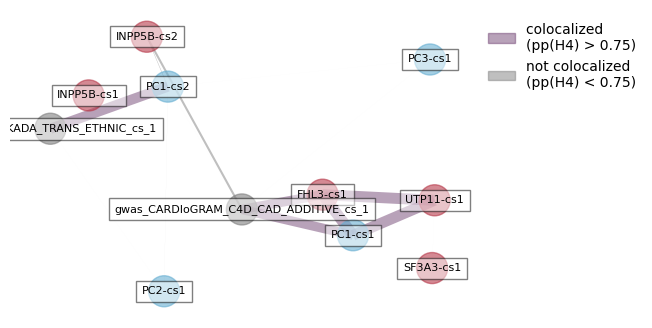

In [19]:
# Create an undirected graph
G = nx.Graph()

# Add edges to the graph with weights
for index, row in pd.concat([cluster_pairs_qtl, cluster_pairs]).iterrows():
    G.add_edge(row['id1_short'], row['id2_short'], weight=row['PP.H4.abf'])

# Get edge weights for thickness
edge_weights = [G[u][v]['weight']*8 for u, v in G.edges()]
edge_colors = ['#734675' if G[u][v]['weight'] > 0.75 else 'gray' for u, v in G.edges()]
node_colors = ['#808080' if 'gwas' in node else '#67AFD2' if 'PC' in node else '#B83A4B' for node in G.nodes()]

fig, ax = plt.subplots(figsize=(6, 4)) 

pos = nx.spring_layout(G, k=1)  
nx.draw_networkx_nodes(G, pos, node_size=500, node_color=node_colors, alpha=0.6, ax=ax)
nx.draw_networkx_edges(G, pos, width=edge_weights, edge_color=edge_colors, alpha=0.5, ax=ax)
nx.draw_networkx_labels(G, pos, ax=ax, font_size=8, bbox= dict(facecolor='white', alpha=0.5, edgecolor='k'))
ax.axis('off')  # Turn off the axis

# Create legend
purple_patch = mpatches.Patch(color='#734675', alpha=0.5, label='colocalized \n(pp(H4) > 0.75)')
gray_patch = mpatches.Patch(color='gray', alpha=0.5, label='not colocalized \n(pp(H4) < 0.75)')
ax.legend(handles=[purple_patch, gray_patch], loc='upper right', frameon=False)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.show()

### cluster correlation plot

In [34]:
clusters = load_clusters_annotated(config, row['tissue_id'])
example_cluster = clusters[clusters['cluster_id'] == row['cluster_id']].iloc[0]
example_cluster

N_genes                                                                            4
Transcripts                        ENSG00000204084.12,ENSG00000183431.11,ENSG0000...
Perc_cor                                                                    0.833333
Mean_cor                                                                    0.315498
Mean_pos_cor                                                                0.315498
Mean_neg_cor                                                                     NaN
Chromosome                                                                         1
Tissue                                                                 Artery_Tibial
cluster_size                                                                  163732
cluster_tss_size                                                               62201
start                                                                     37861092.0
end                                                              

In [30]:
def plot_cluster(example_cluster, cbar=False):
    # gene gene ids sorted by tss start
    sorted_cluster = gid_gencode.loc[example_cluster['cluster_id'].split('_')].sort_values('tss_start')
    sorted_gene_ids = sorted_cluster.index.values
    # get normed expression 
    expression = load_cluster_expression(config, example_cluster['Tissue'])
    cluster_expression = expression[(expression['cluster_id']==example_cluster['cluster_id'])].set_index('egene_id').loc[sorted_gene_ids]
    # get correlation of expression
    sample_ids = cluster_expression.columns[cluster_expression.columns.str.contains('GTEX')]
    cluster_corr, cluster_pvalue = spearmanr(cluster_expression[sample_ids], axis=1)
    # make df wtih readable gene names
    cluster_corr = pd.DataFrame(cluster_corr, index=sorted_cluster['gene_name'].values, columns=sorted_cluster['gene_name'].values)

    # make corr plot
    corr_cmap = LinearSegmentedColormap.from_list('corr', [(0, '#3e8093ff'), (.5, 'white'), (1, '#c4553aff')])
    fig_size = int(len(cluster_corr)/2)
    print(fig_size)
    fig, ax = plt.subplots(figsize=(fig_size, fig_size))
    sns.heatmap(cluster_corr, mask=np.triu(np.ones_like(cluster_corr), k=1),
                cmap=corr_cmap, vmin=-1, vmax=1, ax=ax, 
                cbar_kws={'label':'Spearman Corrleation'}, 
                xticklabels=True, yticklabels=True, cbar=cbar)
    ax.tick_params("y", rotation=0) 
    plt.show()

2


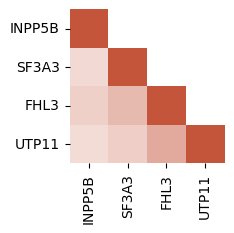

In [33]:
plot_cluster(example_cluster)

### finemapping

In [70]:
susie_annotated = load_susie_annotated(config, row['tissue_id'])
susie_annotated = susie_annotated[~(susie_annotated['egene_id_list'] == '[nan]')]
susie_annotated['egene_qtl_slope'] = susie_annotated['egene_qtl_slope'].progress_apply(ast.literal_eval)
susie_annotated['egene_id_list'] = susie_annotated['egene_id_list'].progress_apply(ast.literal_eval)

  0%|          | 0/78271 [00:00<?, ?it/s]

  0%|          | 0/78271 [00:00<?, ?it/s]

In [71]:
# expand out over all egenes for a given qtl
susie_annotated_egene_explode = susie_annotated.explode(['egene_qtl_slope', 'egene_id_list'])

# weight by pip
susie_annotated_egene_explode['pip_weighted_eqtl_slope'] = susie_annotated_egene_explode['egene_qtl_slope']*susie_annotated_egene_explode['pip']

# group by egene
egene_grouped_eqtl_mapped = susie_annotated_egene_explode.groupby(['phenotype_id', 'cs_id', 'tissue_id', 'egene_id_list']).agg({'type':'first',
                                                                                  'cluster_id':'first',
                                                                                  'lead_variant_id':'first',
                                                                                  'pip_weighted_eqtl_slope':sum}).reset_index()

# group by credible set
cs_grouped_eqtl_mapped = egene_grouped_eqtl_mapped.groupby(['phenotype_id', 'cs_id', 'tissue_id']).agg({'type':'first',
                                                                                  'cluster_id':'first',
                                                                                  'lead_variant_id':'first',
                                                                                  'egene_id_list':list,
                                                                                  'pip_weighted_eqtl_slope':list}).reset_index()

In [72]:
pcqtl_cs_id = example_signals.iloc[1]['cs_id'][1].split('_cluster')[0].split('qtl_')[1]
pcqtl_cs_id

'ENSG00000183386.9_ENSG00000183431.11_ENSG00000183520.11_ENSG00000204084.12_pc1_cs_2'

In [84]:
example_signals['signal_id'].values

array(['gwas_CARDIoGRAM_C4D_CAD_ADDITIVE_cs_1_cluster_ENSG00000183386.9_ENSG00000183431.11_ENSG00000183520.11_ENSG00000204084.12_tissue_Artery_Tibial-qtl_ENSG00000183386.9_ENSG00000183431.11_ENSG00000183520.11_ENSG00000204084.12_e_ENSG00000183386.9_cs_1_cluster_ENSG00000183386.9_ENSG00000183431.11_ENSG00000183520.11_ENSG00000204084.12_tissue_Artery_Tibial-qtl_ENSG00000183386.9_ENSG00000183431.11_ENSG00000183520.11_ENSG00000204084.12_pc1_cs_1_cluster_ENSG00000183386.9_ENSG00000183431.11_ENSG00000183520.11_ENSG00000204084.12_tissue_Artery_Tibial',
       'gwas_RA_OKADA_TRANS_ETHNIC_cs_1_cluster_ENSG00000183386.9_ENSG00000183431.11_ENSG00000183520.11_ENSG00000204084.12_tissue_Artery_Tibial-qtl_ENSG00000183386.9_ENSG00000183431.11_ENSG00000183520.11_ENSG00000204084.12_pc1_cs_2_cluster_ENSG00000183386.9_ENSG00000183431.11_ENSG00000183520.11_ENSG00000204084.12_tissue_Artery_Tibial'],
      dtype=object)

In [81]:
pcqtl_cs = cs_grouped_eqtl_mapped[cs_grouped_eqtl_mapped['cs_id'] == pcqtl_cs_id]
print(pcqtl_cs['egene_id_list'].iloc[0])
print(pcqtl_cs['pip_weighted_eqtl_slope'].iloc[0])

['ENSG00000183386.9', 'ENSG00000183431.11', 'ENSG00000183520.11', 'ENSG00000204084.12']
[-0.000466395780669527, 0.007484425187789331, 0.002045850611475728, 0.029890771107957265]


In [73]:
pcqtl_cs = susie_annotated[susie_annotated['cs_id'] == pcqtl_cs_id]
pcqtl_cs

,phenotype_id,variant_id,cs_id,type,pip,cluster_id,start_distance,end_distance,af,ma_samples,...,num_tads_qtl,qtl_in_tad,between_tss,qtl_in_tss_ctcf,qtl_in_tad_ctcf,in_bidirectional_promoter,in_shared_promoter,cluster_min_distance,cs_num,lead_variant_id
72032,ENSG00000183386.9_ENSG00000183431.11_ENSG00000...,chr1_37801053_AACTG_A_b38,ENSG00000183386.9_ENSG00000183431.11_ENSG00000...,pcqtl,0.047233,ENSG00000183386.9_ENSG00000183431.11_ENSG00000...,-146004.0,-208205.0,0.255137,253.0,...,2,True,False,False,False,False,True,146004,2,chr1_37909257_A_C_b38
72033,ENSG00000183386.9_ENSG00000183431.11_ENSG00000...,chr1_37803164_T_C_b38,ENSG00000183386.9_ENSG00000183431.11_ENSG00000...,pcqtl,0.046190,ENSG00000183386.9_ENSG00000183431.11_ENSG00000...,-143893.0,-206094.0,0.242295,240.0,...,2,True,False,False,False,False,True,143893,2,chr1_37909257_A_C_b38
72034,ENSG00000183386.9_ENSG00000183431.11_ENSG00000...,chr1_37818475_C_A_b38,ENSG00000183386.9_ENSG00000183431.11_ENSG00000...,pcqtl,0.055337,ENSG00000183386.9_ENSG00000183431.11_ENSG00000...,-128582.0,-190783.0,0.241438,239.0,...,1,False,False,False,False,False,True,128582,2,chr1_37909257_A_C_b38
72035,ENSG00000183386.9_ENSG00000183431.11_ENSG00000...,chr1_37819884_G_A_b38,ENSG00000183386.9_ENSG00000183431.11_ENSG00000...,pcqtl,0.053660,ENSG00000183386.9_ENSG00000183431.11_ENSG00000...,-127173.0,-189374.0,0.240582,238.0,...,1,False,False,False,False,False,True,127173,2,chr1_37909257_A_C_b38
72036,ENSG00000183386.9_ENSG00000183431.11_ENSG00000...,chr1_37820221_G_T_b38,ENSG00000183386.9_ENSG00000183431.11_ENSG00000...,pcqtl,0.027440,ENSG00000183386.9_ENSG00000183431.11_ENSG00000...,-126836.0,-189037.0,0.252568,250.0,...,1,False,False,False,False,False,True,126836,2,chr1_37909257_A_C_b38
72037,ENSG00000183386.9_ENSG00000183431.11_ENSG00000...,chr1_37824431_C_T_b38,ENSG00000183386.9_ENSG00000183431.11_ENSG00000...,pcqtl,0.053660,ENSG00000183386.9_ENSG00000183431.11_ENSG00000...,-122626.0,-184827.0,0.240582,238.0,...,1,False,False,False,False,False,True,122626,2,chr1_37909257_A_C_b38
72038,ENSG00000183386.9_ENSG00000183431.11_ENSG00000...,chr1_37825665_C_T_b38,ENSG00000183386.9_ENSG00000183431.11_ENSG00000...,pcqtl,0.053660,ENSG00000183386.9_ENSG00000183431.11_ENSG00000...,-121392.0,-183593.0,0.240582,238.0,...,1,False,False,False,False,False,True,121392,2,chr1_37909257_A_C_b38
72039,ENSG00000183386.9_ENSG00000183431.11_ENSG00000...,chr1_37828954_C_T_b38,ENSG00000183386.9_ENSG00000183431.11_ENSG00000...,pcqtl,0.035606,ENSG00000183386.9_ENSG00000183431.11_ENSG00000...,-118103.0,-180304.0,0.242295,240.0,...,1,False,False,False,False,False,True,118103,2,chr1_37909257_A_C_b38
72040,ENSG00000183386.9_ENSG00000183431.11_ENSG00000...,chr1_37835548_G_A_b38,ENSG00000183386.9_ENSG00000183431.11_ENSG00000...,pcqtl,0.053660,ENSG00000183386.9_ENSG00000183431.11_ENSG00000...,-111509.0,-173710.0,0.240582,238.0,...,1,False,False,False,False,False,True,111509,2,chr1_37909257_A_C_b38
72041,ENSG00000183386.9_ENSG00000183431.11_ENSG00000...,chr1_37853212_CT_C_b38,ENSG00000183386.9_ENSG00000183431.11_ENSG00000...,pcqtl,0.042493,ENSG00000183386.9_ENSG00000183431.11_ENSG00000...,-93845.0,-156046.0,0.253425,251.0,...,1,False,False,False,False,False,True,93845,2,chr1_37909257_A_C_b38


### enahncer first approach

In [116]:
susie_annotated = load_across_tissues(config, load_susie_annotated)

In [119]:
susie_annotated.columns

Index(['phenotype_id', 'variant_id', 'cs_id', 'type', 'pip', 'cluster_id',
       'start_distance', 'end_distance', 'af', 'ma_samples', 'ma_count',
       'pval_nominal', 'qtl_slope', 'qtl_slope_se', 'qtl_variance',
       'egene_variance_list', 'egene_id_list', 'egene_qtl_slope',
       'egene_qtl_slope_se', 'egene_pc_r2', 'egene_pc_slope',
       'egene_qtl_slope_flipped', 'vep_info', 'position', 'chr', 'tissue_id',
       'Transcripts', 'avg_expression', 'avg_log_expression',
       'median_expression', 'min_expression', 'qtl_num_abc_enhancers',
       'qtl_num_abc_genes', 'qtl_matched_abc_genes', 'tss_min', 'tss_max',
       'Chromosome', 'interval', 'num_ctcf_peak', 'has_ctcf_peak',
       'num_ctcf_point', 'has_ctcf_point', 'qtl_in_ctcf', 'start', 'end',
       'qtl_inter', 'num_tads_qtl', 'qtl_in_tad', 'between_tss',
       'qtl_in_tss_ctcf', 'qtl_in_tad_ctcf', 'in_bidirectional_promoter',
       'in_shared_promoter', 'cluster_min_distance', 'cs_num',
       'lead_variant_id'],


In [140]:
abc_clusters = susie_annotated[susie_annotated['qtl_matched_abc_genes']>2]['cluster_id'].unique()
abc_cs = susie_annotated[susie_annotated['qtl_matched_abc_genes']>2]['cs_id'].unique()


In [139]:
underlying_signals[underlying_signals['cluster_id'].isin(abc_clusters)]


,signal_id,num_qtl_coloc,num_gwas_coloc,num_e_coloc,num_pc_coloc,multiple_e,multiple_pc,type,cluster_id,tissue_id,cs_id,gwas_type
101,gwas_Astle_et_al_2016_Monocyte_count_cs_1_clus...,2,2,1,1,False,False,both,ENSG00000142089.15_ENSG00000185201.16_ENSG0000...,Muscle_Skeletal,[gwas_Astle_et_al_2016_Monocyte_count_cs_1_clu...,2
141,gwas_Astle_et_al_2016_Neutrophil_count_cs_2_cl...,3,1,1,2,False,True,both,ENSG00000142089.15_ENSG00000185201.16_ENSG0000...,Muscle_Skeletal,[gwas_Astle_et_al_2016_Neutrophil_count_cs_2_c...,1
224,gwas_UKB_1160_Sleep_duration_cs_2_cluster_ENSG...,1,1,1,0,False,False,eqtl_only,ENSG00000025434.18_ENSG00000110514.19_ENSG0000...,Adipose_Visceral_Omentum,[gwas_UKB_1160_Sleep_duration_cs_2_cluster_ENS...,1
230,gwas_UKB_1180_Morning_or_evening_person_chrono...,1,1,1,0,False,False,eqtl_only,ENSG00000025434.18_ENSG00000110514.19_ENSG0000...,Adipose_Visceral_Omentum,[gwas_UKB_1180_Morning_or_evening_person_chron...,1
237,gwas_Astle_et_al_2016_Neutrophil_count_cs_2_cl...,3,1,1,2,False,True,both,ENSG00000142089.15_ENSG00000185201.16_ENSG0000...,Skin_Sun_Exposed_Lower_leg,[gwas_Astle_et_al_2016_Neutrophil_count_cs_2_c...,1
245,gwas_Astle_et_al_2016_Monocyte_count_cs_1_clus...,3,1,2,1,True,False,both,ENSG00000142089.15_ENSG00000185201.16_ENSG0000...,Skin_Sun_Exposed_Lower_leg,[gwas_Astle_et_al_2016_Monocyte_count_cs_1_clu...,1
277,gwas_Astle_et_al_2016_Sum_basophil_neutrophil_...,1,1,1,0,False,False,eqtl_only,ENSG00000142089.15_ENSG00000185201.16_ENSG0000...,Skin_Sun_Exposed_Lower_leg,[gwas_Astle_et_al_2016_Sum_basophil_neutrophil...,1
552,gwas_Astle_et_al_2016_Neutrophil_count_cs_2_cl...,1,1,1,0,False,False,eqtl_only,ENSG00000142089.15_ENSG00000185201.16_ENSG0000...,Thyroid,[gwas_Astle_et_al_2016_Neutrophil_count_cs_2_c...,1
553,gwas_Astle_et_al_2016_Granulocyte_count_cs_1_c...,1,4,0,1,False,False,pcqtl_only,ENSG00000142089.15_ENSG00000185201.16_ENSG0000...,Thyroid,[gwas_Astle_et_al_2016_Granulocyte_count_cs_1_...,4
577,gwas_Astle_et_al_2016_Red_blood_cell_count_cs_...,1,1,1,0,False,False,eqtl_only,ENSG00000179364.13_ENSG00000183828.14_ENSG0000...,Thyroid,[gwas_Astle_et_al_2016_Red_blood_cell_count_cs...,1


In [145]:
underlying_signals.iloc[553]['cs_id']

['gwas_Astle_et_al_2016_Granulocyte_count_cs_1_cluster_ENSG00000142089.15_ENSG00000185201.16_ENSG00000185885.15_tissue_Thyroid',
 'gwas_Astle_et_al_2016_Neutrophil_count_cs_1_cluster_ENSG00000142089.15_ENSG00000185201.16_ENSG00000185885.15_tissue_Thyroid',
 'gwas_Astle_et_al_2016_Sum_eosinophil_basophil_counts_cs_1_cluster_ENSG00000142089.15_ENSG00000185201.16_ENSG00000185885.15_tissue_Thyroid',
 'gwas_Astle_et_al_2016_Sum_neutrophil_eosinophil_counts_cs_1_cluster_ENSG00000142089.15_ENSG00000185201.16_ENSG00000185885.15_tissue_Thyroid',
 'qtl_ENSG00000142089.15_ENSG00000185201.16_ENSG00000185885.15_pc2_cs_3_cluster_ENSG00000142089.15_ENSG00000185201.16_ENSG00000185885.15_tissue_Thyroid']

In [37]:
abc = load_abc(row['tissue_id'], full_gencode)